## III. Methodology

### Data Preprocessing:

First, we will clean up our data and join together the tables to create a finished table with all the features we need to build our models.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Start with the fangraphs table
fg = pd.read_csv('fangraphs/fg_career_data.csv')
fg.head()

,Name,Team,G,PA,HR,R,RBI,SB,ISO,BABIP,...,HBP,SF,SH,GDP,BB/K,wRAA,wRC,WPA,RE24,playerid
0,Eduardo Rodriguez,Brewers,30,1,0,1,0.0,0.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1,NaN,NaN,1011102
1,Scott Munninghoff,Phillies,4,1,0,1,0.0,0.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1,0.07,0.92,1009324
2,Eric Cammack,Mets,8,1,0,0,1.0,0.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.1,1,0.00,1.00,1001864
3,Frank O'Connor,Phillies,3,2,1,1,3.0,0.0,1.5,1.0,...,0.0,NaN,NaN,NaN,0.0,1.9,2,NaN,NaN,1009712
4,Hub Knolls,Superbas,2,2,0,0,0.0,0.0,1.0,NaN,...,0.0,NaN,1.0,NaN,NaN,1.5,2,NaN,NaN,1007047


In [3]:
# Filter to just batters who played at least 1200 games
fg = fg[fg['G'] >= 1200]
fg.head()

,Name,Team,G,PA,HR,R,RBI,SB,ISO,BABIP,...,HBP,SF,SH,GDP,BB/K,wRAA,wRC,WPA,RE24,playerid
249,Babe Ruth,- - -,2503,10616,714,2174,2217.0,123.0,0.348,0.340,...,43.0,NaN,113.0,2.0,1.55,1437.2,2727,NaN,NaN,1011327
265,Ted Williams,Red Sox,2292,9791,521,1798,1839.0,24.0,0.289,0.328,...,39.0,20.0,5.0,197.0,2.85,1219.8,2349,NaN,NaN,1014040
310,Lou Gehrig,Yankees,2164,9660,493,1888,1995.0,102.0,0.292,0.332,...,45.0,NaN,106.0,2.0,1.91,1046.8,2265,NaN,NaN,1004598
354,Jimmie Foxx,- - -,2317,9670,534,1751,1922.0,87.0,0.284,0.336,...,13.0,NaN,71.0,69.0,1.11,934.2,2136,NaN,NaN,1004285
357,Rogers Hornsby,- - -,2259,9475,301,1579,1584.0,135.0,0.218,0.365,...,48.0,NaN,216.0,3.0,1.53,899.0,2018,NaN,NaN,1006030


In [4]:
# id mapping table
id_map = pd.read_csv('mlb_rosetta-master/mlb_rosetta.csv', dtype={'retrosheet_id': object, 'lahman_id': object, 'baseball_reference_id': object})
id_map.head()

,id,first,last,current,bis_id,bis_milb_id,retrosheet_id,stats_inc_id,baseball_db_id,baseball_prospectus_id,lahman_id,westbay_id,korea_kbo_id,japan_npb_id,baseball_reference_id,uuid,duplicate,created_at,updated_at
0,110001,Hank,Aaron,NaN,1000001.0,NaN,aaroh101,NaN,NaN,AARON19340205A,aaronha01,NaN,NaN,NaN,aaronha01,5a36cc6f-e91d-4cbe-b7a4-25178b6a6123,NaN,2010-12-30 04:39:45,2010-12-30 04:39:45
1,110002,Tommie,Aaron,NaN,1000002.0,NaN,aarot101,NaN,NaN,AARON19390805A,aaronto01,NaN,NaN,NaN,aaronto01,a3f2f0b1-6c75-42dc-a29b-98ea86396fb2,NaN,2010-12-30 04:39:45,2010-12-30 04:39:45
2,110003,Don,Aase,NaN,1000003.0,NaN,aased001,NaN,NaN,AASE19540908A,aasedo01,NaN,NaN,NaN,aasedo01,d7b213bc-85e2-49ab-8911-1b9b26e4d327,NaN,2010-12-30 04:39:45,2011-03-18 23:52:53
3,110004,John,Abadie,NaN,1000004.0,NaN,abadj101,NaN,NaN,ABADIE18541104A,abadijo01,NaN,NaN,NaN,abadijo01,14973d8b-c6eb-44f3-b14b-0c245ec56515,NaN,2010-12-30 04:39:45,2010-12-30 04:39:45
4,110005,Ed,Abbaticchio,NaN,1000005.0,NaN,abbae101,NaN,NaN,ABBATICCH18770415A,abbated01,NaN,NaN,NaN,abbated01,e51cc3d1-ec1f-43d7-a5f1-e62bddc3ea3d,NaN,2010-12-30 04:39:45,2010-12-30 04:39:45


In [5]:
# Just keep lahman_id and bis_id (fangraphs id)
id_map = id_map[['bis_id', 'lahman_id', 'baseball_reference_id']]
# Remove rows where there is no lahman_id
id_map = id_map.dropna(subset=['lahman_id'])
# Remove rows where there is no baseball_reference_id
id_map = id_map.dropna(subset=['baseball_reference_id'])
id_map.head()

,bis_id,lahman_id,baseball_reference_id
0,1000001.0,aaronha01,aaronha01
1,1000002.0,aaronto01,aaronto01
2,1000003.0,aasedo01,aasedo01
3,1000004.0,abadijo01,abadijo01
4,1000005.0,abbated01,abbated01


In [6]:
# Rename fangraphs playerid column to be bis_id
fg = fg.rename(columns={'playerid': 'bis_id'})
fg.head()

,Name,Team,G,PA,HR,R,RBI,SB,ISO,BABIP,...,HBP,SF,SH,GDP,BB/K,wRAA,wRC,WPA,RE24,bis_id
249,Babe Ruth,- - -,2503,10616,714,2174,2217.0,123.0,0.348,0.340,...,43.0,NaN,113.0,2.0,1.55,1437.2,2727,NaN,NaN,1011327
265,Ted Williams,Red Sox,2292,9791,521,1798,1839.0,24.0,0.289,0.328,...,39.0,20.0,5.0,197.0,2.85,1219.8,2349,NaN,NaN,1014040
310,Lou Gehrig,Yankees,2164,9660,493,1888,1995.0,102.0,0.292,0.332,...,45.0,NaN,106.0,2.0,1.91,1046.8,2265,NaN,NaN,1004598
354,Jimmie Foxx,- - -,2317,9670,534,1751,1922.0,87.0,0.284,0.336,...,13.0,NaN,71.0,69.0,1.11,934.2,2136,NaN,NaN,1004285
357,Rogers Hornsby,- - -,2259,9475,301,1579,1584.0,135.0,0.218,0.365,...,48.0,NaN,216.0,3.0,1.53,899.0,2018,NaN,NaN,1006030


In [7]:
# Join in lahman_id into fangraphs df
fg = fg.merge(id_map, how='inner', left_on='bis_id', right_on='bis_id')
fg.head()

,Name,Team,G,PA,HR,R,RBI,SB,ISO,BABIP,...,SH,GDP,BB/K,wRAA,wRC,WPA,RE24,bis_id,lahman_id,baseball_reference_id
0,Lou Gehrig,Yankees,2164,9660,493,1888,1995.0,102.0,0.292,0.332,...,106.0,2.0,1.91,1046.8,2265,NaN,NaN,1004598,gehrilo01,gehrilo01
1,Jimmie Foxx,- - -,2317,9670,534,1751,1922.0,87.0,0.284,0.336,...,71.0,69.0,1.11,934.2,2136,NaN,NaN,1004285,foxxji01,foxxji01
2,Rogers Hornsby,- - -,2259,9475,301,1579,1584.0,135.0,0.218,0.365,...,216.0,3.0,1.53,899.0,2018,NaN,NaN,1006030,hornsro01,hornsro01
3,Hank Greenberg,- - -,1394,6096,331,1051,1276.0,58.0,0.292,0.323,...,35.0,66.0,1.01,556.1,1287,NaN,NaN,1004996,greenha01,greenha01
4,Ty Cobb,- - -,3035,13072,117,2246,1937.0,892.0,0.146,0.378,...,295.0,NaN,2.70,1093.8,2534,NaN,NaN,1002378,cobbty01,cobbty01


In [8]:
# People table
people = pd.read_csv('lahman/People.csv')
people.head()

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,...,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,...,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,...,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,...,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01


In [9]:
# Just keep debut and finalGame
people = people[['playerID', 'debut', 'finalGame']]
people.head()

,playerID,debut,finalGame
0,aardsda01,2004-04-06,2015-08-23
1,aaronha01,1954-04-13,1976-10-03
2,aaronto01,1962-04-10,1971-09-26
3,aasedo01,1977-07-26,1990-10-03
4,abadan01,2001-09-10,2006-04-13


In [10]:
# Get debut year, final year and number of seasons
people['debut_year'] = pd.DatetimeIndex(people['debut']).year
people['final_year'] = pd.DatetimeIndex(people['finalGame']).year
people['seasons'] = people['final_year'] - people['debut_year'] + 1
people = people[['playerID', 'debut_year', 'final_year', 'seasons']]
people.head()

,playerID,debut_year,final_year,seasons
0,aardsda01,2004.0,2015.0,12.0
1,aaronha01,1954.0,1976.0,23.0
2,aaronto01,1962.0,1971.0,10.0
3,aasedo01,1977.0,1990.0,14.0
4,abadan01,2001.0,2006.0,6.0


In [11]:
# filter to final_year <= 2006 and seasons >= 10 to get only a list of HOF eligible players who we are confident have already had their HOF fate determined
people = people[(people['final_year'] <= 2006) & (people['seasons'] >= 10)]
people.head()

,playerID,debut_year,final_year,seasons
1,aaronha01,1954.0,1976.0,23.0
2,aaronto01,1962.0,1971.0,10.0
3,aasedo01,1977.0,1990.0,14.0
7,abbated01,1897.0,1910.0,14.0
12,abbotgl01,1973.0,1984.0,12.0


In [12]:
# Join debut year and final year into fangraphs df
fg = fg.merge(people, how='inner', left_on='lahman_id', right_on='playerID')
fg.head()

,Name,Team,G,PA,HR,R,RBI,SB,ISO,BABIP,...,wRC,WPA,RE24,bis_id,lahman_id,baseball_reference_id,playerID,debut_year,final_year,seasons
0,Lou Gehrig,Yankees,2164,9660,493,1888,1995.0,102.0,0.292,0.332,...,2265,NaN,NaN,1004598,gehrilo01,gehrilo01,gehrilo01,1923.0,1939.0,17.0
1,Jimmie Foxx,- - -,2317,9670,534,1751,1922.0,87.0,0.284,0.336,...,2136,NaN,NaN,1004285,foxxji01,foxxji01,foxxji01,1925.0,1945.0,21.0
2,Rogers Hornsby,- - -,2259,9475,301,1579,1584.0,135.0,0.218,0.365,...,2018,NaN,NaN,1006030,hornsro01,hornsro01,hornsro01,1915.0,1937.0,23.0
3,Hank Greenberg,- - -,1394,6096,331,1051,1276.0,58.0,0.292,0.323,...,1287,NaN,NaN,1004996,greenha01,greenha01,greenha01,1930.0,1947.0,18.0
4,Ty Cobb,- - -,3035,13072,117,2246,1937.0,892.0,0.146,0.378,...,2534,NaN,NaN,1002378,cobbty01,cobbty01,cobbty01,1905.0,1928.0,24.0


In [13]:
# Allstar table
allstar = pd.read_csv('lahman/AllstarFull.csv')
allstar.head()

,playerID,yearID,gameNum,gameID,teamID,lgID,GP,startingPos
0,gomezle01,1933,0,ALS193307060,NYA,AL,1.0,1.0
1,ferreri01,1933,0,ALS193307060,BOS,AL,1.0,2.0
2,gehrilo01,1933,0,ALS193307060,NYA,AL,1.0,3.0
3,gehrich01,1933,0,ALS193307060,DET,AL,1.0,4.0
4,dykesji01,1933,0,ALS193307060,CHA,AL,1.0,5.0


In [14]:
# Get number of allstar appearances per player
allstar = allstar[allstar['gameNum'].isin([0, 1])]
allstar = allstar.groupby('playerID').size().to_frame('all_star_apps').reset_index()
allstar.head()

,playerID,all_star_apps
0,aaronha01,21
1,aasedo01,1
2,abreubo01,2
3,abreujo02,2
4,adamsac01,1


In [15]:
# Join raw_all_star_apps into fangraphs df
fg = fg.merge(allstar, how='left', left_on='lahman_id', right_on='playerID')
fg['all_star_apps'].fillna(0, inplace=True)
fg.head()

,Name,Team,G,PA,HR,R,RBI,SB,ISO,BABIP,...,RE24,bis_id,lahman_id,baseball_reference_id,playerID_x,debut_year,final_year,seasons,playerID_y,all_star_apps
0,Lou Gehrig,Yankees,2164,9660,493,1888,1995.0,102.0,0.292,0.332,...,NaN,1004598,gehrilo01,gehrilo01,gehrilo01,1923.0,1939.0,17.0,gehrilo01,7.0
1,Jimmie Foxx,- - -,2317,9670,534,1751,1922.0,87.0,0.284,0.336,...,NaN,1004285,foxxji01,foxxji01,foxxji01,1925.0,1945.0,21.0,foxxji01,9.0
2,Rogers Hornsby,- - -,2259,9475,301,1579,1584.0,135.0,0.218,0.365,...,NaN,1006030,hornsro01,hornsro01,hornsro01,1915.0,1937.0,23.0,NaN,0.0
3,Hank Greenberg,- - -,1394,6096,331,1051,1276.0,58.0,0.292,0.323,...,NaN,1004996,greenha01,greenha01,greenha01,1930.0,1947.0,18.0,greenha01,5.0
4,Ty Cobb,- - -,3035,13072,117,2246,1937.0,892.0,0.146,0.378,...,NaN,1002378,cobbty01,cobbty01,cobbty01,1905.0,1928.0,24.0,NaN,0.0


In [16]:
# HOF labels table
hof = pd.read_csv('baseball_ref/hof.csv')
hof.head()

,Year,Name,Unnamed: 2,Voted By,Inducted As,Votes,% of Ballots
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019.0,Harold Baines\baineha01,1959-Living,Veterans,Player,NaN,NaN
2,2019.0,Roy Halladay\hallaro01,1977-2017,BBWAA,Player,363.0,85.4%
3,2019.0,Edgar Martinez\martied01,1963-Living,BBWAA,Player,363.0,85.4%
4,2019.0,Mike Mussina\mussimi01,1968-Living,BBWAA,Player,326.0,76.7%


In [17]:
# Clean HOF table
hof[['Name', 'baseball_reference_id']] = hof.Name.str.split('\\',expand=True,)
hof['HOF'] = 1
hof = hof[~hof['baseball_reference_id'].isnull()]
hof = hof[['baseball_reference_id', 'HOF']]
hof.head()

,baseball_reference_id,HOF
1,baineha01,1
2,hallaro01,1
3,martied01,1
4,mussimi01,1
5,riverma01,1


In [18]:
# Join HOF labels into fangraphs df
fg = fg.merge(hof, how='left', left_on='baseball_reference_id', right_on='baseball_reference_id')
fg.head()

,Name,Team,G,PA,HR,R,RBI,SB,ISO,BABIP,...,bis_id,lahman_id,baseball_reference_id,playerID_x,debut_year,final_year,seasons,playerID_y,all_star_apps,HOF
0,Lou Gehrig,Yankees,2164,9660,493,1888,1995.0,102.0,0.292,0.332,...,1004598,gehrilo01,gehrilo01,gehrilo01,1923.0,1939.0,17.0,gehrilo01,7.0,1.0
1,Jimmie Foxx,- - -,2317,9670,534,1751,1922.0,87.0,0.284,0.336,...,1004285,foxxji01,foxxji01,foxxji01,1925.0,1945.0,21.0,foxxji01,9.0,1.0
2,Rogers Hornsby,- - -,2259,9475,301,1579,1584.0,135.0,0.218,0.365,...,1006030,hornsro01,hornsro01,hornsro01,1915.0,1937.0,23.0,NaN,0.0,1.0
3,Hank Greenberg,- - -,1394,6096,331,1051,1276.0,58.0,0.292,0.323,...,1004996,greenha01,greenha01,greenha01,1930.0,1947.0,18.0,greenha01,5.0,1.0
4,Ty Cobb,- - -,3035,13072,117,2246,1937.0,892.0,0.146,0.378,...,1002378,cobbty01,cobbty01,cobbty01,1905.0,1928.0,24.0,NaN,0.0,1.0


In [19]:
fg['HOF'].fillna(0, inplace=True)
fg.head()

,Name,Team,G,PA,HR,R,RBI,SB,ISO,BABIP,...,bis_id,lahman_id,baseball_reference_id,playerID_x,debut_year,final_year,seasons,playerID_y,all_star_apps,HOF
0,Lou Gehrig,Yankees,2164,9660,493,1888,1995.0,102.0,0.292,0.332,...,1004598,gehrilo01,gehrilo01,gehrilo01,1923.0,1939.0,17.0,gehrilo01,7.0,1.0
1,Jimmie Foxx,- - -,2317,9670,534,1751,1922.0,87.0,0.284,0.336,...,1004285,foxxji01,foxxji01,foxxji01,1925.0,1945.0,21.0,foxxji01,9.0,1.0
2,Rogers Hornsby,- - -,2259,9475,301,1579,1584.0,135.0,0.218,0.365,...,1006030,hornsro01,hornsro01,hornsro01,1915.0,1937.0,23.0,NaN,0.0,1.0
3,Hank Greenberg,- - -,1394,6096,331,1051,1276.0,58.0,0.292,0.323,...,1004996,greenha01,greenha01,greenha01,1930.0,1947.0,18.0,greenha01,5.0,1.0
4,Ty Cobb,- - -,3035,13072,117,2246,1937.0,892.0,0.146,0.378,...,1002378,cobbty01,cobbty01,cobbty01,1905.0,1928.0,24.0,NaN,0.0,1.0


In [20]:
# Remove features with NaN values
fg = fg[[x for x in fg.columns if x not in [x for x in fg.columns if fg[x].isnull().values.any()]]]
fg.head()

,Name,Team,G,PA,HR,R,RBI,SB,ISO,AVG,...,wRC,bis_id,lahman_id,baseball_reference_id,playerID_x,debut_year,final_year,seasons,all_star_apps,HOF
0,Lou Gehrig,Yankees,2164,9660,493,1888,1995.0,102.0,0.292,0.340,...,2265,1004598,gehrilo01,gehrilo01,gehrilo01,1923.0,1939.0,17.0,7.0,1.0
1,Jimmie Foxx,- - -,2317,9670,534,1751,1922.0,87.0,0.284,0.325,...,2136,1004285,foxxji01,foxxji01,foxxji01,1925.0,1945.0,21.0,9.0,1.0
2,Rogers Hornsby,- - -,2259,9475,301,1579,1584.0,135.0,0.218,0.358,...,2018,1006030,hornsro01,hornsro01,hornsro01,1915.0,1937.0,23.0,0.0,1.0
3,Hank Greenberg,- - -,1394,6096,331,1051,1276.0,58.0,0.292,0.313,...,1287,1004996,greenha01,greenha01,greenha01,1930.0,1947.0,18.0,5.0,1.0
4,Ty Cobb,- - -,3035,13072,117,2246,1937.0,892.0,0.146,0.366,...,2534,1002378,cobbty01,cobbty01,cobbty01,1905.0,1928.0,24.0,0.0,1.0


### Implementation And Refinement

First we will scale our features using the StandardScaler. Then, we will split our data into a training set and a testing set (15%). We will make accuracy our scorer.

In [21]:
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=DataConversionWarning)

scorer = make_scorer(accuracy_score)

features = ['G', 'PA', 'HR', 'R', 'RBI', 'SB', 'ISO', 'AVG', 'OBP', 'SLG', 'wOBA', 'wRC+', 'BsR', 'Off', 'Def', 'WAR', 'AB', 'H', '1B', '2B', '3B', 'BB', 'HBP', 'wRAA', 'wRC', 'debut_year', 'final_year', 'seasons', 'all_star_apps']
X = StandardScaler().fit_transform(fg[features])
y = fg['HOF']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=13)

#### Random Forests

We will use Random Forests with Grid Search to choose the optimal Random Forests model:

In [22]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {'max_depth': [3, None],
              'max_features': [1, 3, 10],
              'min_samples_split': [2, 3, 10],
              'bootstrap': [True, False],
              'criterion': ['gini', 'entropy'],
              'n_estimators': [10, 100]
             }

rf = RandomForestClassifier(random_state=13)
rf_grid_obj = GridSearchCV(rf, param_grid, scoring=scorer, cv=5)
rf_grid_fit = rf_grid_obj.fit(X_train, y_train)
best_rf = rf_grid_fit.best_estimator_

y_pred = best_rf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Random Forest Testing Set Accuracy: " + str(round(100*acc, 2)) + "%")
print("Random Forest Testing Set F1-score: " + str(round(f1, 4)))

Random Forest Testing Set Accuracy: 85.19%
Random Forest Testing Set F1-score: 0.5


#### Logistic Regression 

We will use Logistic Regression with L1 Regularization to choose the optimal Logistic Regression model (with built-in feature selection):

In [23]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l1', solver='liblinear', random_state=13)
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Logistic Regression Testing Set Accuracy: " + str(round(100*acc, 2)) + "%")
print("Logistic Regression Testing Set F1-score: " + str(round(f1, 4)))

Logistic Regression Testing Set Accuracy: 86.42%
Logistic Regression Testing Set F1-score: 0.5926


#### Support Vector Machines

We will use Support Vector Machines with Grid Search to choose the optimal Support Vector Machines model:

In [24]:
from sklearn.svm import SVC

param_grid = {'kernel':('linear', 'rbf'),
              'C':(1,0.25,0.5,0.75),
              'gamma': (1,2,3,'auto'),
              'decision_function_shape':('ovo','ovr'),
              'shrinking':(True,False)
             }

svm = SVC(random_state=13)
svm_grid_obj = GridSearchCV(svm, param_grid, scoring=scorer, cv=5)
svm_grid_fit = svm_grid_obj.fit(X_train, y_train)
best_svm = svm_grid_fit.best_estimator_

y_pred = best_svm.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("SVM Testing Set Accuracy: " + str(round(100*acc, 2)) + "%")
print("SVM Testing Set F1-score: " + str(round(f1, 4)))

SVM Testing Set Accuracy: 86.42%
SVM Testing Set F1-score: 0.56


#### Neural Networks (MLP)

After experimenting with various architechtures, epochs and batch size, this MLP performed the best:

In [25]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout

model = Sequential()
model.add(Dense(32, input_dim=len(features), kernel_initializer='normal', activation='relu'))
model.add(Dense(16, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=40, batch_size=10, verbose=0)

acc = model.evaluate(X_test, y_test)[1]
f1 = f1_score(y_test, y_pred)
print("MLP Testing Set Accuracy: " + str(round(100*acc, 2)) + "%")
print("MLP Testing Set F1-score: " + str(round(f1, 4)))

Using TensorFlow backend.


81/81 [==============================] - 0s 412us/step
MLP Testing Set Accuracy: 86.42%
MLP Testing Set F1-score: 0.56


## IV. Results

### Model Evaluation and Validation

#### Choosing and evaluating a final model

After reviewing the metrics for all the models, we will choose the Logistic Regression model we created as our final model. This model was tied for the highest accuracy at 86.42% and it had the highest F1-score of 0.5926. Additionally, this model was the fastest to train.

Let's examine the coefficients for our logistic regression model to see which features had the highest influence:

In [26]:
coefficients_dict = dict(zip(features, lr.coef_[0]))
coefficients_dict

{'1B': 0.0,
 '2B': 0.0,
 '3B': 0.42381017592336356,
 'AB': 0.0,
 'AVG': 0.7838007926940174,
 'BB': 0.0,
 'BsR': 0.5749675116834414,
 'Def': 0.2139754992952219,
 'G': 0.0,
 'H': 0.0,
 'HBP': -0.007101296195415733,
 'HR': 0.5320802441639144,
 'ISO': 0.0,
 'OBP': 0.7047394117926162,
 'Off': 0.0,
 'PA': 0.0,
 'R': 0.0,
 'RBI': 0.33324835740618186,
 'SB': -0.20912837628006892,
 'SLG': 0.0,
 'WAR': 1.340148220583923,
 'all_star_apps': 0.8874638722733965,
 'debut_year': -1.13493930335757,
 'final_year': 0.0,
 'seasons': 0.131239657297181,
 'wOBA': 0.0,
 'wRAA': 0.0,
 'wRC': 0.0,
 'wRC+': -0.8942864667647683}

In [27]:
top_5_coefficients = sorted(list(abs(lr.coef_[0])))[-5:]
top_coefficients_dict = {key: coefficients_dict[key] for key in coefficients_dict if abs(coefficients_dict[key]) in top_5_coefficients}
top_coefficients_dict

{'AVG': 0.7838007926940174,
 'WAR': 1.340148220583923,
 'all_star_apps': 0.8874638722733965,
 'debut_year': -1.13493930335757,
 'wRC+': -0.8942864667647683}

The features with the highest positive effect on HOF status: AVG, wRC+, WAR and All-star appearances  
The feature with the highest negative effect on HOF status: Debut year  
  
This tells us that performing well in AVG, wRC+ and WAR, and making All-star appearances are key factors for being inducted into the HOF. This also shows that it was easier for players who debuted further in the past to be inducted. 

### Justification

#### Comparing the final model to benchmark

Our model performed significantly better than the benchmark model. It's accuracy was 86.42% compared to 82% for the benchmark model, and it's F1-score was 0.5926 compared to 0 for the benchmark model.

## II. Analysis

### Data Exploration

In [29]:
features = [x for x in fg.columns if x not in ['Name', 'Team', 'bis_id', 'lahman_id', 'baseball_reference_id', 'playerID_x', 'playerID_y', 'HOF']]
print("Features:")
print(features)
print()
print("Number of features: " + str(len(features)))

Features:
['G', 'PA', 'HR', 'R', 'RBI', 'SB', 'ISO', 'AVG', 'OBP', 'SLG', 'wOBA', 'wRC+', 'BsR', 'Off', 'Def', 'WAR', 'AB', 'H', '1B', '2B', '3B', 'BB', 'HBP', 'wRAA', 'wRC', 'debut_year', 'final_year', 'seasons', 'all_star_apps']

Number of features: 29


These are baseball statistics. For more information, go to the glossary at https://library.fangraphs.com/fangraphs-library-glossary/

To do some initial data exploration, we can focus on a few important features: Games (G), Hits (H) and Home Runs (HR).

In [30]:
some_features = ['G', 'H', 'HR']

In [31]:
fg_non_hof = fg[fg['HOF'] == 0][some_features]
fg_non_hof_describe = fg_non_hof.describe()
print("Non-HOF distributions:")
fg_non_hof_describe

Non-HOF distributions:


,G,H,HR
count,443.000000,443.000000,443.000000
mean,1599.753950,1508.480813,118.300226
std,318.586152,403.416806,100.815353
min,1200.000000,466.000000,2.000000
25%,1336.500000,1215.000000,39.000000
50%,1516.000000,1447.000000,91.000000
75%,1813.000000,1758.000000,168.000000
max,2700.000000,2715.000000,583.000000


In [32]:
fg_hof = fg[fg['HOF'] == 1][some_features]
fg_hof_describe = fg_hof.describe()[1:]
print("HOF distributions:")
fg_hof_describe

HOF distributions:


,G,H,HR
mean,2069.288660,2316.391753,199.164948
std,496.269478,637.695045,171.122622
min,1215.000000,1161.000000,9.000000
25%,1673.000000,1779.000000,69.000000
50%,2120.000000,2299.000000,138.000000
75%,2422.000000,2735.000000,301.000000
max,3298.000000,4189.000000,755.000000


In [35]:
comparison_df = pd.merge(fg_non_hof_describe, fg_hof_describe, left_index=True, right_index=True, suffixes=('_non_hof', '_hof'))
comparison_df = comparison_df.reindex(columns=sorted(comparison_df.columns))
print("Comparison:")
comparison_df

Comparison:


,G_hof,G_non_hof,HR_hof,HR_non_hof,H_hof,H_non_hof
mean,2069.288660,1599.753950,199.164948,118.300226,2316.391753,1508.480813
std,496.269478,318.586152,171.122622,100.815353,637.695045,403.416806
min,1215.000000,1200.000000,9.000000,2.000000,1161.000000,466.000000
25%,1673.000000,1336.500000,69.000000,39.000000,1779.000000,1215.000000
50%,2120.000000,1516.000000,138.000000,91.000000,2299.000000,1447.000000
75%,2422.000000,1813.000000,301.000000,168.000000,2735.000000,1758.000000
max,3298.000000,2700.000000,755.000000,583.000000,4189.000000,2715.000000


Medians:  
  
Non-HOF:  
G: 1516  
HR: 91  
H: 1447  
  
HOF:  
G: 2120  
HR: 128  
H: 2299  
  
This shows that these three metrics likely have a strong positive relationship with HOF status

We also see from the table that every HOF player has at least 1215 games, 9 home runs and 1161 hits.

In [36]:
def make_hof_pct_table(df1):
    result = df1.groupby('HOF').size().to_frame('count').reset_index()
    result['pct'] = round(100*(result['count'] / len(df1)), 1)
    return result

In [37]:
games_club = fg[fg['G'] >= 2800][['G', 'HOF']]
games_pct = make_hof_pct_table(games_club)
games_pct

,HOF,count,pct
0,1.0,9,100.0


100% of players (9/9) with 2800 games are in the HOF

In [38]:
five_hundred_club = fg[fg['HR'] >= 500][['HR', 'HOF']]
five_hundred_pct = make_hof_pct_table(five_hundred_club)
five_hundred_pct

,HOF,count,pct
0,0.0,1,10.0
1,1.0,9,90.0


90% of players (9/10) with 500 HR are in the HOF

In [39]:
threek_club = fg[fg['H'] >= 3000][['H', 'HOF']]
threek_pct = make_hof_pct_table(threek_club)
threek_pct

,HOF,count,pct
0,1.0,15,100.0


100% of players (15/15) with 3000 hits are in the HOF

### Exploratory Visualization

To visualize how the distributions of the features differ for HOF players and Non-HOF players, we can plot their histograms

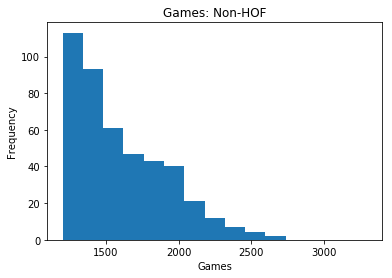

In [40]:
plt.title('Games: Non-HOF')
plt.hist(fg_non_hof['G'], bins=15, range=(fg['G'].min(), fg['G'].max()))
plt.ylabel('Frequency')
plt.xlabel('Games')
plt.show()

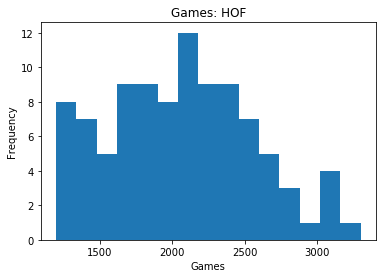

In [41]:
plt.title('Games: HOF')
plt.hist(fg_hof['G'], bins=15, range=(fg['G'].min(), fg['G'].max()))
plt.ylabel('Frequency')
plt.xlabel('Games')
plt.show()

We see that the HOF distribution for Games is more symmetric and has a much higher center.

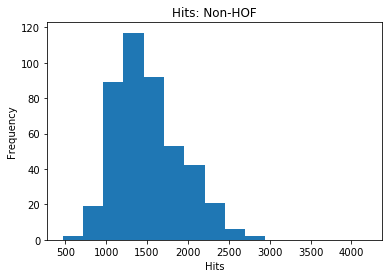

In [42]:
plt.title('Hits: Non-HOF')
plt.hist(fg_non_hof['H'], bins=15, range=(fg['H'].min(), fg['H'].max()))
plt.ylabel('Frequency')
plt.xlabel('Hits')
plt.show()

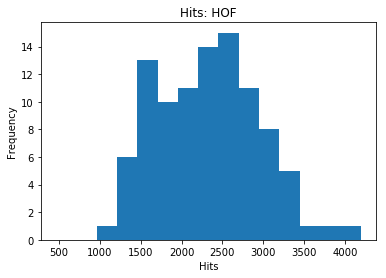

In [43]:
plt.title('Hits: HOF')
plt.hist(fg_hof['H'], bins=15, range=(fg['H'].min(), fg['H'].max()))
plt.ylabel('Frequency')
plt.xlabel('Hits')
plt.show()

We again see that the HOF distribution for Hits is more symmetric and has a much higher center.

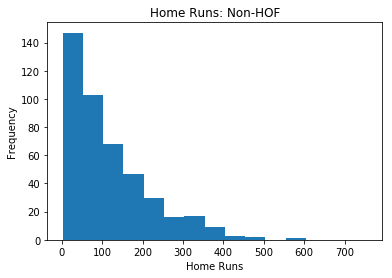

In [44]:
plt.title('Home Runs: Non-HOF')
plt.hist(fg_non_hof['HR'], bins=15, range=(fg['HR'].min(), fg['HR'].max()))
plt.ylabel('Frequency')
plt.xlabel('Home Runs')
plt.show()

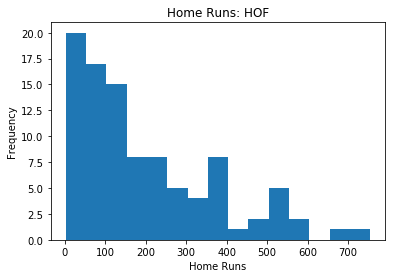

In [45]:
plt.title('Home Runs: HOF')
plt.hist(fg_hof['HR'], bins=15, range=(fg['HR'].min(), fg['HR'].max()))
plt.ylabel('Frequency')
plt.xlabel('Home Runs')
plt.show()

Both distributions for Home Runs are very right-skewed, however the HOF distribution has many more high valued observations.

It is clear from these graphs that these features have a positive relationship with HOF status.

### Algorithms and Techniques

The algorithms we will use for this project are 1) Random Forests, 2) Logistic Regression, 3) Support Vector Machines, and 4) Neural Networks (MLP). All of these algorithms are suitable for classification problems such as the one we are trying to solve. While these algorithms all have their strengths and weaknesses, we will attempt to solve the problem using each of them and compare their performances to see which is best for this case.

### Benchmark

As a benchmark model, we can compare our results to a simple/naive model that classifies every player as not a hall of famer (0).

In [46]:
# simple model / baseline:
simple = make_hof_pct_table(fg)
simple

,HOF,count,pct
0,0.0,443,82.0
1,1.0,97,18.0


Since the bar for induction is very high, and only roughly 15% of eligible players are ultimately inducted, this model has an accuracy of 82%. However, this model would have a Precision of 100%, a Recall of 0%, and thus a an F1-score of 0, since it simply classifies all players as negative.

## V. Conclusion

### Free-Form Visualization

In examining the Logistic Regression coefficients, we saw that WAR was the feature with the most influence, and it had a positive relationship with HOF status. We can see this has merit by plotting the distributions of WAR for HOF players and non-HOF players:

In [56]:
fg_non_hof = fg[fg['HOF'] == 0][['HOF','WAR']]
fg_hof = fg[fg['HOF'] == 1][['HOF','WAR']]

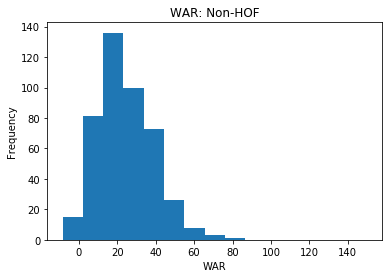

In [57]:
plt.title('WAR: Non-HOF')
plt.hist(fg_non_hof['WAR'], bins=15, range=(fg['WAR'].min(), fg['WAR'].max()))
plt.ylabel('Frequency')
plt.xlabel('WAR')
plt.show()

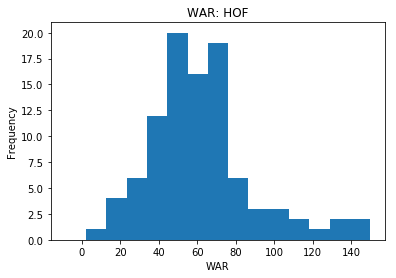

In [58]:
plt.title('WAR: HOF')
plt.hist(fg_hof['WAR'], bins=15, range=(fg['WAR'].min(), fg['WAR'].max()))
plt.ylabel('Frequency')
plt.xlabel('WAR')
plt.show()

We see that the HOF distribution contains much higher values in general. It appears that almost all of the Non-HOF players have a WAR less than the mean WAR for HOF players. This makes sense given our findings.